In [1]:
import numpy as np 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import defaultdict

import string
import re
import gensim
import nltk
nltk.download('punkt')
from gensim.parsing.preprocessing import STOPWORDS
lemmatizer=WordNetLemmatizer()

seed = 42



%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Importing all the neccessary libraries
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from gensim.models import Word2Vec, KeyedVectors
import pickle
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.datasets import *
import sklearn.datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from wordcloud import WordCloud
from tqdm import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
import re
import gensim
import nltk
nltk.download('punkt')
from gensim.parsing.preprocessing import STOPWORDS

#Expand the reviews x is aninput string of any length. Convert all the words to lower case
def preprocessing(text):
    text = str(text).lower()
    text = text.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because").replace("i've"," i have").replace("ive"," i have").replace("don't","do not").replace("dont","do not")
    
    text = re.sub(r'&lt;', ' ', text) #remove '&lt;' tag
    text = re.sub(r'[^\x00-\x7f]', ' ', text) #remove non ASCII strings
    text = re.sub(r'<.*?>', ' ', text) 
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"www.\S+", " ", text)
    
    text = re.sub(r'&lt;', ' ', text) #remove '&lt;' tag
    text = re.sub(r'<.*?>', ' ', text) # remove html
    text = re.sub(r'[0-9]+', ' ', text) #remove number
    text = re.sub(r'[^\w\s]', ' ', text) #remove punctiation    
    
    for c in ['\r', '\n', '\t'] :
        text = re.sub(c, ' ', text) #replace newline and tab with tabs\
        text = re.sub('\s+', ' ', text) #replace multiple spaces with one space
    
    
    all_stopwords_gensim = STOPWORDS.union(set(['good','better','card','like','right','get','come','want','trying','look','think','need',
                                            'gpus','subreddit', 'haveseek','haveremaining','ratechapterschaptersdescriptionsdescriptions',
                                            'came','seeing','mentioned','offering','offered','left','got','said','took', 'selectedcaptionscaptions','havel',
                                            'ti','looking', 'm','help','tried','know','welcome','potato','u','varies','visiin',
                                            'comment','buildapcforme','sure','amd','gpu','cpu','having','have',
                                            'getting','yes','lot','thanks','going','dollar', 'pm']))
    tokens_vs_stop = word_tokenize(text)
    text = ' '.join([word for word in tokens_vs_stop if not word in all_stopwords_gensim])

        
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
import spacy
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

def posta(texts, allowed_postags=['NOUN', 'VERB']):  # ['NOUN', 'ADJ', 'VERB', 'ADV']
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token for token in doc if token.pos_ in allowed_postags]) # sửa, bỏ lemma đi
    return texts_out

In [84]:
def get_data(file_name):  
    data = pd.read_csv(file_name)
    return data

In [85]:
# import data
filename = r"C:\Users\USER\Documents\GitHub\GPU\streamlit\data\data_rx6900_Reddit_070822.csv"
red = pd.read_csv(filename, index_col = 0)
red.head(3)

,comment_id,submission_id,comment_time,comment_score,comment_text,url,num_all_comments,submission_score,submission_subreddit,post_date,submission_title,post_text
0,ij5xj4r,whiumq,8/6/2022,3,"Nice, always playing with the settings. What s...",https://www.reddit.com/gallery/whiumq,10,14,r/hoggit,8/6/2022,Flying with the Boys. We've all learned how to...,no post text
1,ij5yaop,whiumq,8/6/2022,1,Nice. I am trying to learn to refuel the Tomca...,https://www.reddit.com/gallery/whiumq,10,14,r/hoggit,8/6/2022,Flying with the Boys. We've all learned how to...,no post text
2,ij664q1,whiumq,8/6/2022,1,This is a server that I run called Death Deale...,https://www.reddit.com/gallery/whiumq,10,14,r/hoggit,8/6/2022,Flying with the Boys. We've all learned how to...,no post text


In [52]:
#process post text and title to add more information (need to process separately to avoid duplicate text to cmt)
red['post_text'] = red.post_text + red.submission_title
posts = red.drop_duplicates(subset='post_text', keep='first')
red['comment_text'] = red.comment_text.apply(preprocessing)
posts['post_text'] = posts.post_text.apply(preprocessing)


In [53]:
data_posts = posts[:]
data_text = data_posts.post_text.tolist()
data_list = list(data_text)
data_words = [i.split() for i in data_list]

pos_text = posta(data_words , allowed_postags=['NOUN', 'VERB'])

posts['pos_post_text'] = pos_text
posts['pos_post_text'] = posts['pos_post_text'].apply(lambda x: ' '.join(map(str, x)))

data_red = red[:]
data_text = data_red.comment_text.tolist()
data_list = list(data_text)
data_words = [i.split() for i in data_list]

pos_text = posta(data_words , allowed_postags=['NOUN', 'VERB'])

red['pos_comment_text'] = pos_text
red['pos_comment_text'] = red['pos_comment_text'].apply(lambda x: ' '.join(map(str, x)))

In [71]:
#getting the entire text == total_vocabulary
# finally take the text from red['pos_comment_text'] for comments and from posts['pos_post_text']
corpus =" "
for j in range(0,3427):
    corpus= corpus+ ' ' + red['pos_comment_text'].iloc[j]
    
for j in range(0,230):
    corpus= corpus+ ' ' + posts['pos_post_text'].iloc[j]
    
tokens_vs_stop = word_tokenize(corpus)
all_text = [word for word in tokens_vs_stop]
total_vocabulary = [WordNetLemmatizer().lemmatize(word) for word in all_text]


In [55]:
print(len(total_vocabulary))

38704


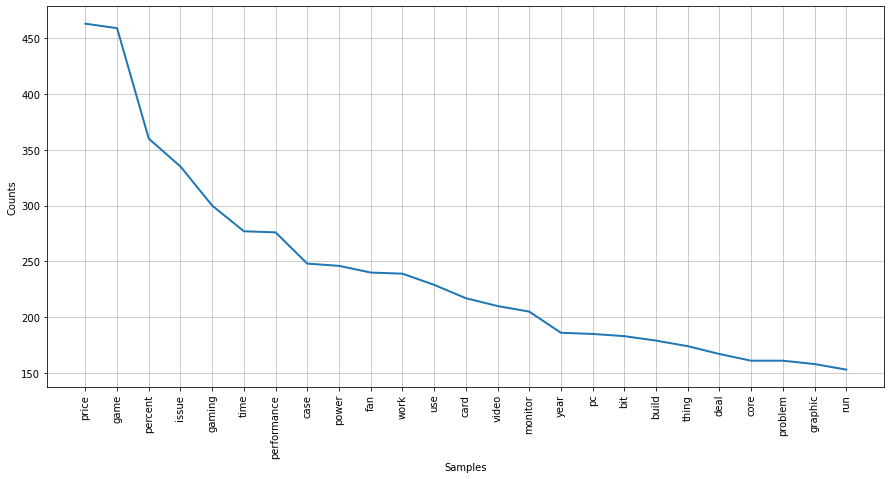

In [56]:
freq_dist = nltk.FreqDist(total_vocabulary)
plt.subplots(figsize=(15,7))
freq_dist.plot(25)

### Top n Gram

In [57]:
from nltk.util import ngrams

def word_freq_bigram(text):

    _1gram = ''.join(text).split(" ")
    _2gram = [' '.join(e) for e in ngrams(_1gram, 2)]
#         _3gram = [' '.join(e) for e in ngrams(_1gram, 3)]
    word_dist = nltk.FreqDist(_2gram)
    most_freq_biGram = word_dist.most_common(50)
        
    return most_freq_biGram

In [58]:
total_vocab_str = " ".join(total_vocabulary)
topword = word_freq_bigram(total_vocab_str)

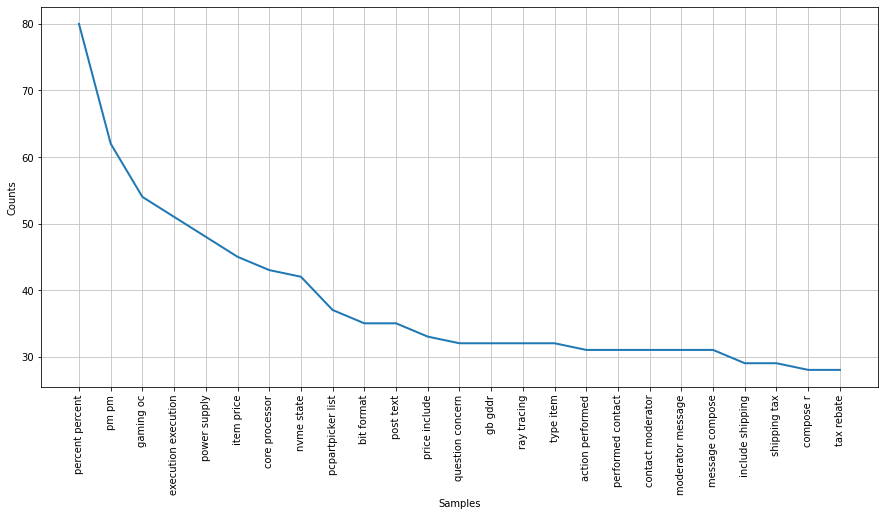

In [61]:
_1gram = ''.join(total_vocab_str).split(" ")
_2gram = [' '.join(e) for e in ngrams(_1gram, 2)]
freq_dist2 = nltk.FreqDist(_2gram)
plt.subplots(figsize=(15,7))
freq_dist2.plot(25)

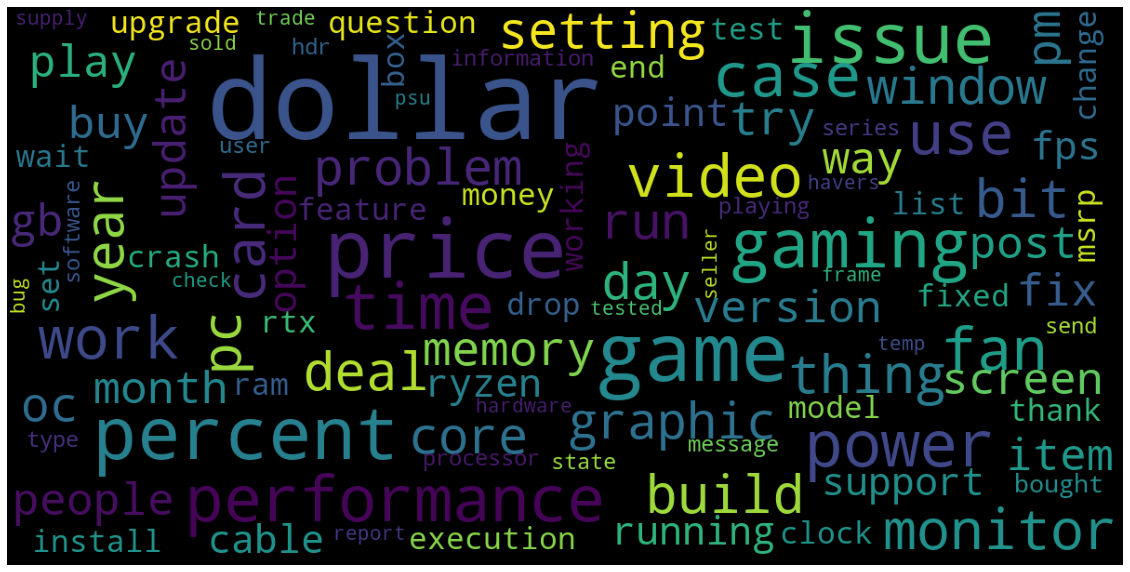

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1) # chosen at random by flipping a coin; it was heads
wordcloud.generate_from_frequencies(frequencies=freq_dist)
fig = plt.figure(1, figsize=(20, 16))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('demo_rx6900_Task3_cloud.png', dpi = 900)
plt.show()

### LDA

In [13]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [93]:
input_more_sw = "playing"
text = [word for word in total_vocabulary if not word in input_more_sw]

In [94]:
text

['setting',
 'setting',
 'running',
 'setting',
 'nvidia',
 'learn',
 'refuel',
 'tip',
 'server',
 'run',
 'called',
 'death',
 'dealer',
 'development',
 'try',
 'pm',
 'pw',
 'gamer',
 'friend',
 'refuse',
 'texture',
 'terrain',
 'civ',
 'traffic',
 'water',
 'medium',
 'visib',
 'range',
 'heat',
 'blur',
 'shadow',
 'shadow',
 're',
 're',
 'dof',
 'lens',
 'motion',
 'cloud',
 'ssaa',
 'percent',
 'forest',
 'detail',
 'scenery',
 'detail',
 'preload',
 'smoke',
 'gamma',
 'aniso',
 'filtering',
 'shadow',
 'cockpit',
 'illum',
 'carrier',
 'deck',
 'wing',
 'sweep',
 'bomb',
 'mode',
 'trim',
 'seat',
 'refueling',
 'pod',
 'try',
 'center',
 'view',
 'added',
 'curve',
 'stick',
 'pilot',
 'induced',
 'oscilations',
 'bitch',
 'take',
 'practice',
 'refuel',
 'flight',
 'stay',
 'curve',
 'suck',
 'learn',
 'anticipate',
 'stay',
 'aircraft',
 'guessing',
 'flying',
 'helicopter',
 'started',
 'thought',
 'fly',
 'week',
 'zipping',
 'issue',
 'flying',
 'control',
 'input',
 

In [83]:
CountVec = CountVectorizer(max_df=0.95, min_df=5, max_features=50000)
data_vectorized = CountVec.fit_transform(total_vocabulary) # fit input data
lda_model_ = LatentDirichletAllocation(n_components=3,
                                      max_iter=10, 
                                      learning_method='online',
                                      learning_offset=70.,
                                      learning_decay = .7,
                                      random_state=0).fit(data_vectorized)

In [15]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(CountVec, lda_model_, n_words=10)        
topic_keywords

[array(['dollar', 'game', 'price', 'gaming', 'power', 'card', 'core',
        'year', 'oc', 'deal'], dtype='<U15'),
 array(['percent', 'issue', 'case', 'performance', 'use', 'build',
        'memory', 'thing', 'buy', 'ryzen'], dtype='<U15'),
 array(['time', 'fan', 'work', 'video', 'monitor', 'pc', 'graphic', 'bit',
        'problem', 'window'], dtype='<U15')]

In [65]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [66]:
pyLDAvis.sklearn.prepare(lda_model_, data_vectorized, CountVec)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.360517  0.000837       1        1  33.680760
1      0.179527 -0.309980       2        1  33.345202
2      0.180990  0.309142       3        1  32.974038, topic_info=          Term         Freq        Total Category  logprob  loglift
332     dollar  1061.000000  1061.000000  Default  30.0000  30.0000
469       game   415.000000   415.000000  Default  29.0000  29.0000
892      price   412.000000   412.000000  Default  28.0000  28.0000
834    percent   389.000000   389.000000  Default  27.0000  27.0000
473     gaming   312.000000   312.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1173    supply    79.355782    79.996358   Topic3  -4.9516   1.1014
104     bought    78.913676    79.553716   Topic3  -4.9572   1.1014
737      model    77.361727    78.001475   Topic3  -4.9771   1.1012
1080       set    72.843509    73.482705   Topic3  -5.0373   1.1007
1118  software    72.787036    73.426795   Topic3  -5.0380   1.1007

[120 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
90        3  0.996194      bit
104       3  0.993040   bought
106       3  0.995140      box
121       2  0.996302    build
130       2  0.991700      buy
...     ...       ...      ...
1338      3  0.990672      way
1348      3  0.995833   window
1354      3  0.995653     work
1358      1  0.990458  working
1370      1  0.997052     year

[90 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])